In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [19]:
# Importing the dataset
dataset = pd.read_csv('creditcard.csv')
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
print("The dataset has {} rows and {} columns.".format(dataset.shape[0], dataset.shape[1]))

The dataset has 284807 rows and 31 columns.


In [21]:
columns = dataset.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
state = np.random.RandomState(42)
X = dataset[columns]
y = dataset[target]
X_outliers = state.uniform(size=(X.shape[0],X.shape[1]))
print("The X_shape and y_shape is : ",X.shape,y.shape)
dataset.isnull().values.any()

The X_shape and y_shape is :  (284807, 30) (284807,)


False

Text(0, 0.5, 'frequency')

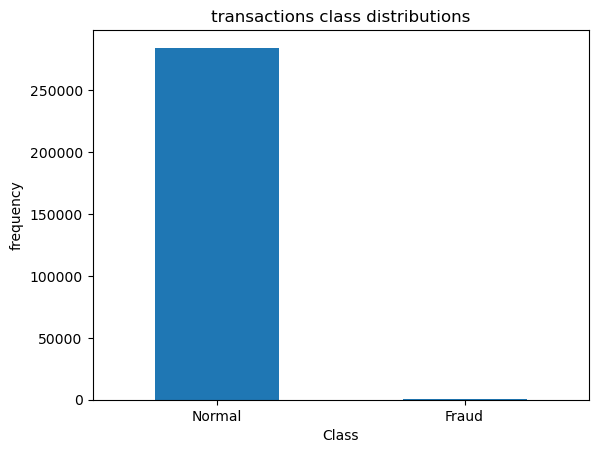

In [31]:
count_classes = pd.value_counts(dataset['Class'],sort=True)
count_classes.plot(kind='bar',rot =0)
plt.title("transactions class distributions")
LABELS = ['Normal','Fraud']
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('frequency')
#You can see this the dataset is imbalanced 

In [32]:
fraud = dataset[dataset['Class']==1]
normal = dataset[dataset['Class']==0]
print("Fraud Shape is ",fraud.shape,"Normal Transaction shape is ",normal.shape)

Fraud Shape is  (492, 31) Normal Transaction shape is  (284315, 31)


In [24]:
# creating a function in which we pass dataset and it give the result of model
def model(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(max_iter=1000)
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Confusion Matrix : ",confusion_matrix(y_test,y_pred))
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("Classification Report : ",classification_report(y_test,y_pred))

The shape of X_res : y_res is  (984, 30) : (984,)
Original dataset shape : Counter({0: 284315, 1: 492})
Resampled dataset shape : Counter({0: 492, 1: 492})


Text(0, 0.5, 'frequency')

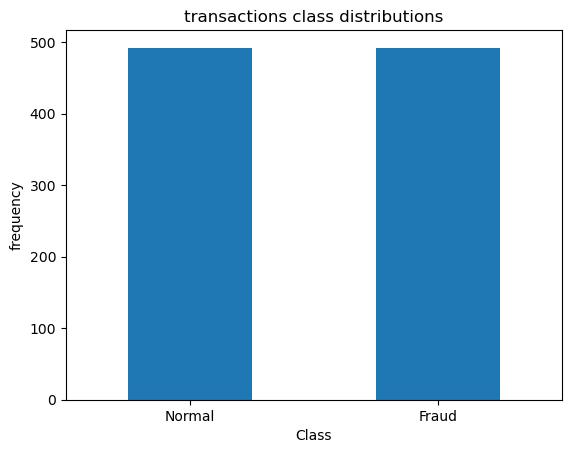

In [36]:
#As mention in assignment we can use python libraries 
#Using Under Sampling Libraries
# (1) Random Under-Sampling
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res_under, y_res_under = nm.fit_resample(X,y)
print("The shape of X_res : y_res is ",X_res_under.shape,":",y_res_under.shape)
#Change is dataset after under sampling
from collections import Counter
print(f"Original dataset shape : {Counter(y)}")
print(f"Resampled dataset shape : {Counter(y_res_under)}")
y_res_under_classes_count = pd.value_counts(y_res_under,sort=True)
y_res_under_classes_count.plot(kind='bar',rot =0)
plt.title("transactions class distributions")
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('frequency')

In [37]:
model(X_res_under,y_res_under)

Confusion Matrix :  [[95  4]
 [ 7 91]]
Accuracy Score :  0.9441624365482234
Classification Report :                precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.96      0.93      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197


The shape of X_res : y_res is  (568630, 30) : (568630,)
Original dataset shape : Counter({0: 284315, 1: 492})
Resampled dataset shape : Counter({0: 284315, 1: 284315})


Text(0, 0.5, 'frequency')

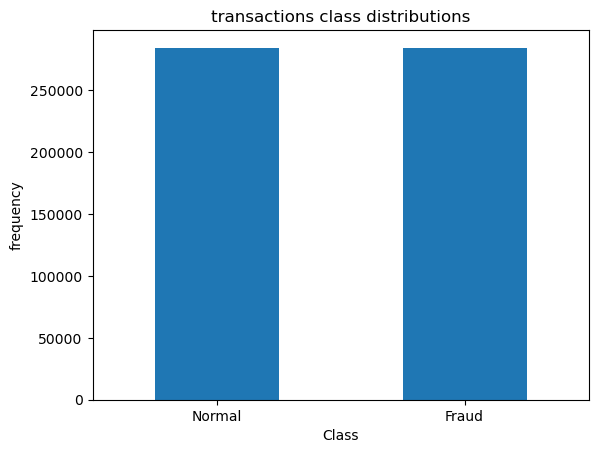

In [38]:
# (2) Random Over-Sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_res_over, y_res_over = ros.fit_resample(X,y)
print("The shape of X_res : y_res is ",X_res_over.shape,":",y_res_over.shape)
#Change is dataset after under sampling
from collections import Counter
print(f"Original dataset shape : {Counter(y)}")
print(f"Resampled dataset shape : {Counter(y_res_over)}")
y_res_over_classes_count = pd.value_counts(y_res_over,sort=True)
y_res_over_classes_count.plot(kind='bar',rot =0)
plt.title("transactions class distributions")
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('frequency')

In [39]:
model(X_res_over,y_res_over)

Confusion Matrix :  [[54840  1910]
 [ 4279 52697]]
Accuracy Score :  0.9455797267115699
Classification Report :                precision    recall  f1-score   support

           0       0.93      0.97      0.95     56750
           1       0.97      0.92      0.94     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726


The shape of X_res : y_res is  (568630, 30) : (568630,)
Original dataset shape : Counter({0: 284315, 1: 492})
Resampled dataset shape : Counter({0: 284315, 1: 284315})


Text(0, 0.5, 'frequency')

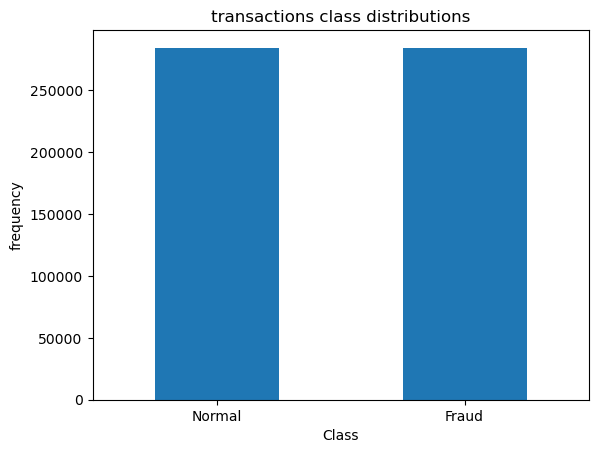

In [40]:
# (3) Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res_smote, y_res_smote = smote.fit_resample(X,y)
print("The shape of X_res : y_res is ",X_res_smote.shape,":",y_res_smote.shape)
#Change is dataset after under sampling
from collections import Counter
print(f"Original dataset shape : {Counter(y)}")
print(f"Resampled dataset shape : {Counter(y_res_smote)}")
y_res_under_classes_count = pd.value_counts(y_res_smote,sort=True)
y_res_under_classes_count.plot(kind='bar',rot =0)
plt.title("transactions class distributions")
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('frequency')

In [41]:
model(X_res_smote,y_res_smote)

Confusion Matrix :  [[55749  1001]
 [ 2046 54930]]
Accuracy Score :  0.9732075338972619
Classification Report :                precision    recall  f1-score   support

           0       0.96      0.98      0.97     56750
           1       0.98      0.96      0.97     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726


The shape of X_res : y_res is  (984, 30) : (984,)
Original dataset shape : Counter({0: 284315, 1: 492})
Resampled dataset shape : Counter({0: 284315, 1: 284298})


Text(0, 0.5, 'frequency')

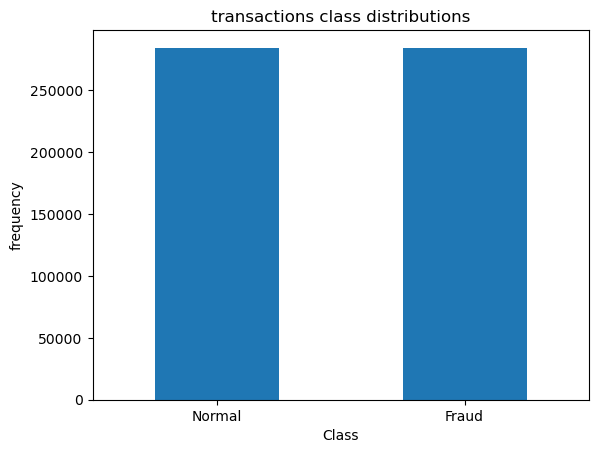

In [42]:
# (4) Adaptive Synthetic Sampling (ASYNC)
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X,y)
print("The shape of X_res : y_res is ",X_res.shape,":",y_res.shape)
#Change is dataset after under sampling
from collections import Counter
print(f"Original dataset shape : {Counter(y)}")
print(f"Resampled dataset shape : {Counter(y_res_adasyn)}")
y_res_adasyn_classes_count = pd.value_counts(y_res_adasyn,sort=True)
y_res_adasyn_classes_count.plot(kind='bar',rot =0)
plt.title("transactions class distributions")
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('frequency')

In [43]:
model(X_res_adasyn,y_res_adasyn)

Confusion Matrix :  [[55762  1045]
 [ 2182 54734]]
Accuracy Score :  0.971624033836603
Classification Report :                precision    recall  f1-score   support

           0       0.96      0.98      0.97     56807
           1       0.98      0.96      0.97     56916

    accuracy                           0.97    113723
   macro avg       0.97      0.97      0.97    113723
weighted avg       0.97      0.97      0.97    113723
